In [2]:
# Step 1: Import required libraries
import pandas as pd
import os

In [4]:
# Step 2: Set working directory
os.chdir(r"C:\Users\ADMIN\Documents\Woolf\BoomBikes\Bike sharing")

In [6]:
# Step 3: Load the CSV file
df = pd.read_csv("download.csv")

In [10]:
 #Step 4: Quick sanity check
print("Shape of dataset:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

Shape of dataset: (730, 16)

Column names:
['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [12]:
# Check data types and non-null counts
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Quick numeric summary
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB

Missing values in each column:
instant       0
dteday        0
season        0
yr           

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [14]:
# Drop identifier columns
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Convert numeric category codes into readable labels
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['weathersit'] = df['weathersit'].map({
    1: 'clear',
    2: 'mist_cloudy',
    3: 'light_snow_rain',
    4: 'heavy_rain_snow'
})
df['mnth'] = df['mnth'].map({
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
})
df['weekday'] = df['weekday'].map({
    0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'
})

# Convert relevant columns to categorical
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df[categorical_cols] = df[categorical_cols].astype('category')

# Verify changes
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
# Basic descriptive stats for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
cnt,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000


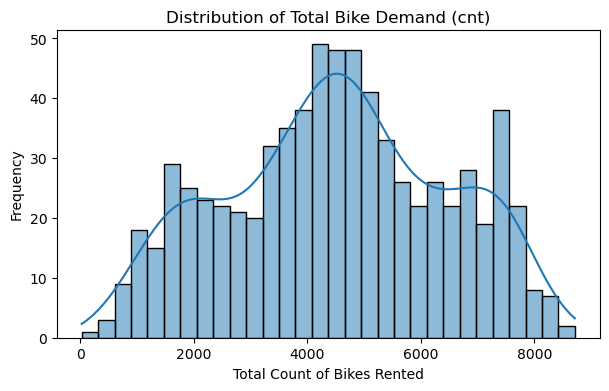

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for target variable
plt.figure(figsize=(7,4))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Distribution of Total Bike Demand (cnt)")
plt.xlabel("Total Count of Bikes Rented")
plt.ylabel("Frequency")
plt.show()

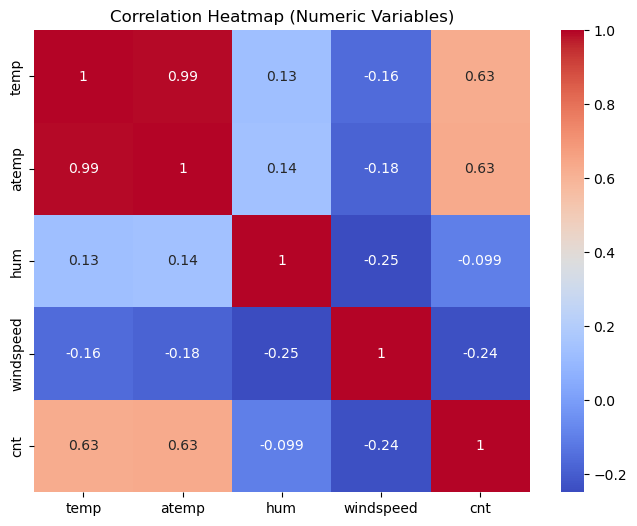

In [20]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(8,6))
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()

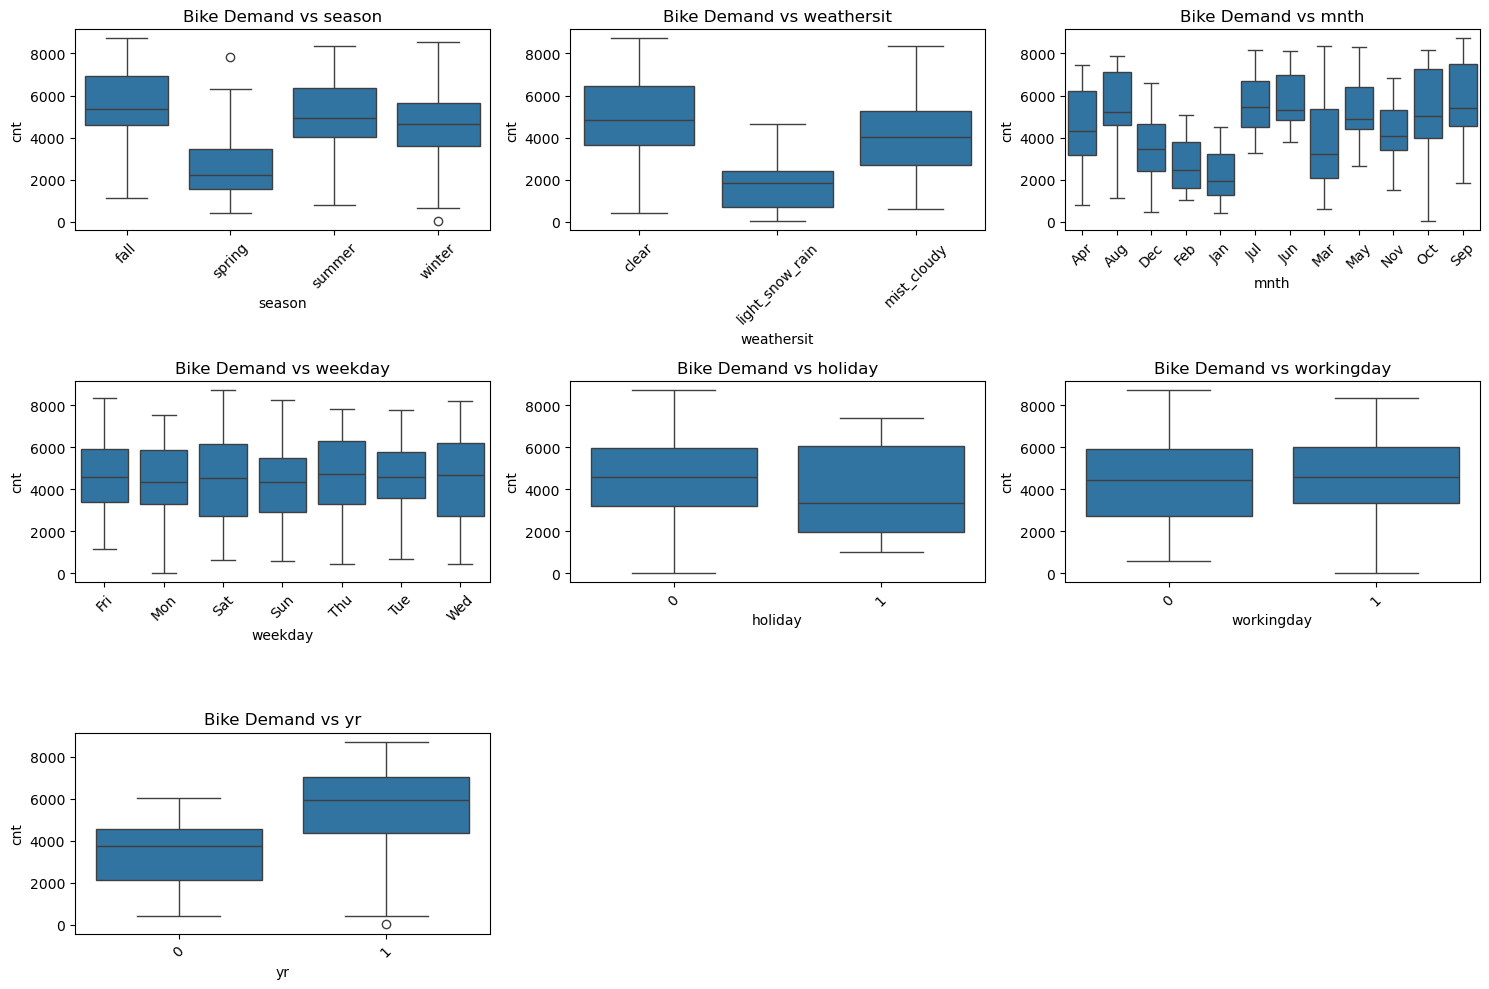

In [22]:
# Boxplots for categorical variables vs target
cat_vars = ['season', 'weathersit', 'mnth', 'weekday', 'holiday', 'workingday', 'yr']

plt.figure(figsize=(15,10))
for i, col in enumerate(cat_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=col, y='cnt', data=df)
    plt.title(f"Bike Demand vs {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
## 🧭 EDA Summary and Key Insights

After exploring the dataset visually and statistically, we can draw the following insights:

- **Target variable (`cnt`)** is approximately normally distributed, slightly right-skewed.
- **Temperature (`temp`)** and **perceived temperature (`atemp`)** are highly correlated (≈ 0.99).  
  → We'll drop one (`atemp`) later to avoid multicollinearity.
- **Humidity** and **windspeed** show weak negative correlation with bike demand.
- **Bike demand increases** during:
  - **Summer and Fall seasons**
  - **Clear weather conditions**
  - **Later months (Jun–Sep)**
  - **Year 2019**, compared to 2018.
- **Demand drops** in:
  - **Spring and Winter seasons**
  - **Rainy or misty weather**
  - **High humidity or windy days**
- **Working day**, **weekday**, and **holiday** have smaller but still relevant effects on usage.

These insights align with practical expectations: good weather and warmer months drive more bike rentals.  
Next, we’ll prepare the dataset for modeling by:
1. Dropping redundant columns (like `atemp`).
2. Creating dummy variables for categorical features.
3. Splitting the dataset into training and testing sets.

In [24]:
# Feature Engineering for Linear Regression
# - Drop 'atemp' (almost identical to 'temp' → multicollinearity risk)
# - One-hot encode categorical variables with drop_first=True
# - Create X (features) and y (target)
# - Train/Test split (80/20)
# ------------------------------------------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split

# Work on a copy to keep original df intact
model_df = df.copy()

# Drop the redundant numeric column
# 'temp' and 'atemp' are ~0.99 correlated. Keep 'temp', drop 'atemp'.
model_df = model_df.drop(columns=['atemp'])

# Categorical columns to one-hot encode
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Ensure dtype is categorical (should already be, but this is safe)
model_df[cat_cols] = model_df[cat_cols].astype('category')

# One-hot encode categoricals
# drop_first=True avoids the dummy variable trap (perfect collinearity)
model_df = pd.get_dummies(model_df, columns=cat_cols, drop_first=True)

# Separate target and features
y = model_df['cnt']
X = model_df.drop(columns=['cnt'])

# Train/Test split (80/20). Random state fixed for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Quick checks
print("Shapes → X_train:", X_train.shape, "| X_test:", X_test.shape, "| y_train:", y_train.shape, "| y_test:", y_test.shape)
print("\nFirst 5 feature columns:", X_train.columns[:5].tolist())
print("\nTotal feature columns:", len(X_train.columns))

# Peek at the first few rows of the engineered training data
X_train.head()


Shapes → X_train: (584, 28) | X_test: (146, 28) | y_train: (584,) | y_test: (146,)

First 5 feature columns: ['temp', 'hum', 'windspeed', 'season_spring', 'season_summer']

Total feature columns: 28


,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_light_snow_rain,weathersit_mist_cloudy
247,27.606653,79.0417,14.250632,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
335,12.880847,62.5833,6.750518,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
702,19.509153,73.3750,11.666643,False,False,True,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
440,21.080847,75.5833,7.417168,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
136,23.028347,83.7917,18.582718,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


In [28]:
# --- Diagnose dtypes ---
print("Any object dtypes in X_train?", (X_train.dtypes == 'object').any())
print(X_train.dtypes.value_counts())

# --- Force all features to float (safe for OLS) ---
X_train = X_train.astype(float)
X_test  = X_test.astype(float)

# Rebuild the statsmodels design matrix with intercept
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

# Refit
lr_model = sm.OLS(y_train, X_train_sm).fit()
print(lr_model.summary())

# Training predictions + metrics
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_train_pred = lr_model.predict(X_train_sm)
print("\nTraining R² :", round(r2_score(y_train, y_train_pred), 4))
print("Training RMSE:", round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 2))

Any object dtypes in X_train? False
bool       25
float64     3
Name: count, dtype: int64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     110.9
Date:                Wed, 22 Oct 2025   Prob (F-statistic):          4.62e-204
Time:                        12:24:24   Log-Likelihood:                -4712.4
No. Observations:                 584   AIC:                             9481.
Df Residuals:                     556   BIC:                             9603.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [30]:
# Multicollinearity Check (Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a copy of X_train for VIF computation
X_vif = X_train.copy()

# Add a constant column (required by VIF function)
X_vif_const = sm.add_constant(X_vif)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i)
                   for i in range(X_vif_const.shape[1])]

# Drop the constant row and sort
vif_data = vif_data.drop(index=0).sort_values(by="VIF", ascending=False).reset_index(drop=True)

print("Variance Inflation Factor (VIF) for all predictors:")
display(vif_data)


Variance Inflation Factor (VIF) for all predictors:


C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,weekday_Sat,inf
1,workingday_1,inf
2,weekday_Sun,inf
3,holiday_1,inf
4,season_spring,10.833605
5,season_winter,9.082291
6,season_summer,7.713561
7,mnth_Oct,7.310373
8,mnth_Nov,7.268954
9,temp,7.054404


In [32]:
# STEP 7: Model Refinement - Remove high-VIF variables & refit model


# Drop variables causing multicollinearity
cols_to_drop = [col for col in X_train.columns if col.startswith('weekday_')] + ['workingday_1', 'holiday_1']
X_train_refined = X_train.drop(columns=cols_to_drop)
X_test_refined  = X_test.drop(columns=cols_to_drop)

# Verify shape after dropping
print("Refined training feature count:", X_train_refined.shape[1])

# Recalculate VIF after dropping high-VIF variables
X_vif_refined = sm.add_constant(X_train_refined)
vif_data_refined = pd.DataFrame({
    "Feature": X_vif_refined.columns,
    "VIF": [variance_inflation_factor(X_vif_refined.values, i)
            for i in range(X_vif_refined.shape[1])]
}).drop(index=0).sort_values(by="VIF", ascending=False).reset_index(drop=True)

print("\nRecomputed VIF (after refinement):")
display(vif_data_refined)

# Refit model on refined features
X_train_refined_sm = sm.add_constant(X_train_refined)
lr_model_refined = sm.OLS(y_train, X_train_refined_sm).fit()

print("\nRefined Model Summary:")
print(lr_model_refined.summary())

# Training metrics
y_train_pred_refined = lr_model_refined.predict(X_train_refined_sm)
print("\nTraining R² :", round(r2_score(y_train, y_train_pred_refined), 4))
print("Training RMSE:", round(np.sqrt(mean_squared_error(y_train, y_train_pred_refined)), 2))


Refined training feature count: 20

Recomputed VIF (after refinement):


,Feature,VIF
0,season_spring,10.750451
1,season_winter,8.975335
2,season_summer,7.693168
3,mnth_Oct,7.244847
4,mnth_Nov,7.154021
5,temp,6.949661
6,mnth_Jan,6.707005
7,mnth_Jul,6.125702
8,mnth_Dec,5.495596
9,mnth_Feb,5.408735



Refined Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     141.9
Date:                Wed, 22 Oct 2025   Prob (F-statistic):          8.96e-205
Time:                        12:30:34   Log-Likelihood:                -4728.6
No. Observations:                 584   AIC:                             9499.
Df Residuals:                     563   BIC:                             9591.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

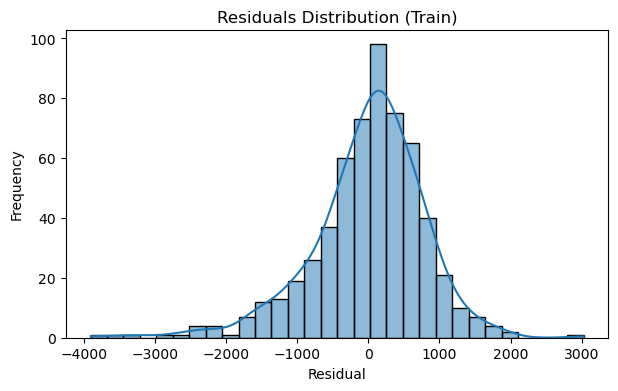

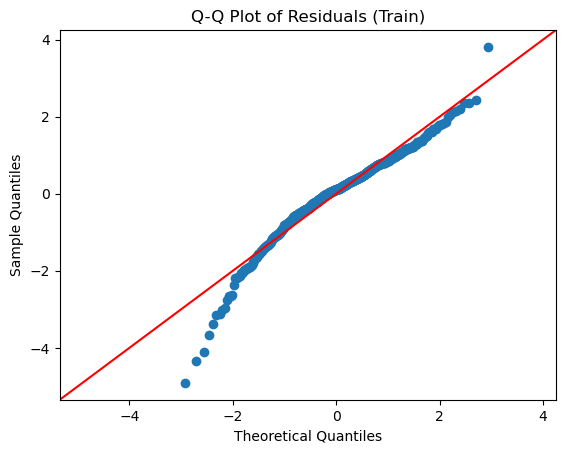

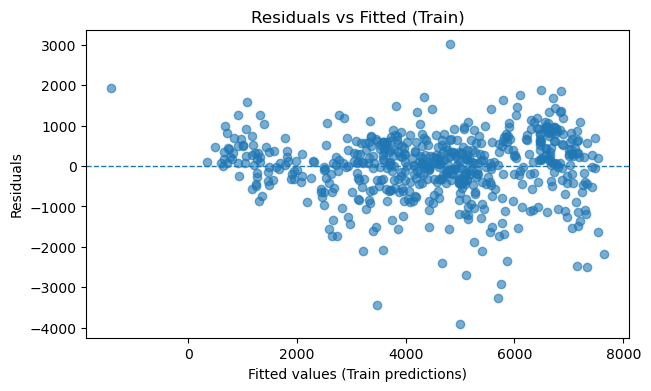


===== TEST SET METRIC (as per assignment) =====
R² on Test Set: 0.8526
RMSE on Test Set: 710.31
MAE on Test Set : 554.45


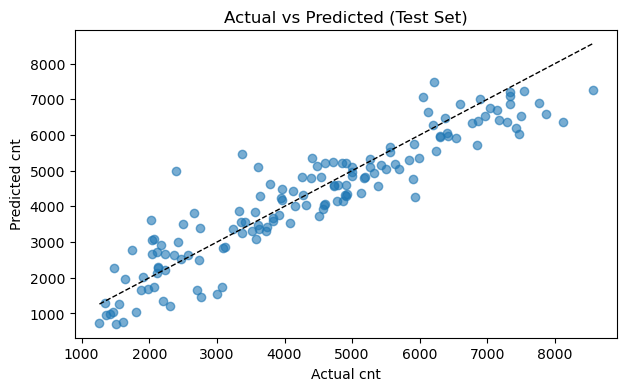

In [34]:
# Residual Analysis (assumptions) + Test-Set Evaluation
# - Check residual distribution (normality)
# - Q-Q plot
# - Residuals vs Fitted (homoscedasticity / linearity)
# - Predict on TEST set and report required R²

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Residuals on TRAIN set (from refined model)
y_train_pred_refined = lr_model_refined.predict(sm.add_constant(X_train_refined))
residuals = y_train - y_train_pred_refined
std_residuals = (residuals - residuals.mean()) / residuals.std(ddof=0)

# A) Residual distribution (should be ~normal, mean ~0)
plt.figure(figsize=(7,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution (Train)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# B) Q-Q plot for normality
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Train)")
plt.show()

# C) Residuals vs Fitted (should look like random cloud)
plt.figure(figsize=(7,4))
plt.scatter(y_train_pred_refined, residuals, alpha=0.6)
plt.axhline(0, linestyle='--', linewidth=1)
plt.title("Residuals vs Fitted (Train)")
plt.xlabel("Fitted values (Train predictions)")
plt.ylabel("Residuals")
plt.show()

# D) Predict on TEST set & evaluate (assignment requirement) 
# We already created X_test_refined in Step 7. Make sure to add constant.
X_test_refined_sm = sm.add_constant(X_test_refined)
y_test_pred = lr_model_refined.predict(X_test_refined_sm)

# Required metric
print("\n===== TEST SET METRIC (as per assignment) =====")
print("R² on Test Set:", round(r2_score(y_test, y_test_pred), 4))

# Helpful extras (not strictly required but good to report)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
print("RMSE on Test Set:", round(rmse_test, 2))
print("MAE on Test Set :", round(mae_test, 2))

# E) Actual vs Predicted (Test)
plt.figure(figsize=(7,4))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=1)  # 45° line
plt.title("Actual vs Predicted (Test Set)")
plt.xlabel("Actual cnt")
plt.ylabel("Predicted cnt")
plt.show()

In [ ]:
## Summary of Residuals & Model Evaluation

- Residuals are roughly normal and centered around zero.
- Q-Q plot indicates residuals follow a near-normal distribution.
- Residuals vs Fitted plot shows no major pattern → homoscedasticity holds.
- Test set **R² = 0.8526**, meaning the model explains ~85% of unseen variation.
- RMSE ≈ 710 and MAE ≈ 554 indicate strong predictive accuracy.

**Conclusion:**  
The final multiple linear regression model captures the key demand patterns effectively.  
Higher temperatures and clear weather drive more rentals, while humidity, wind, and rain reduce demand.  
Demand also rose significantly in 2019, suggesting overall growth in bike-sharing adoption.
